# Conversion Functions

Based on the Math that we have covered in part 2 - Mathematical Theory, we will now create methods to do everything in one line of code.

In [1]:
# IMPORTS
import numpy as np
from scipy.fft import fft, ifft
import matplotlib.pyplot as plt
import librosa
from IPython.display import Audio as play

In [2]:
def getFrequencies(data, sr, f=1000, verbose=True):
    """Returns the Power Spectrum of a data sample with a sample rate of sr.
    Input:
        The result of data, sr = librosa.load(sound, sr=None)
    """
    # Step 1: Transform data
    d = len(data) / sr  # duration (in seconds) of the data
    sp = 1 / sr
    
    time = np.arange(0, d, sp) # get time
    n = len(time)
    y = fft(data, n)           # get FFT values of the data

    freq_axis = np.arange(n) / (sp * n)
    half = np.arange(1, np.floor(n/2), dtype='int')
    
    psd = y * np.conj(y) / n
    
    indices = psd > f
    clean_psd = psd * indices
    y = y * indices

    # Step 2: Plot it
    plt.plot(freq_axis[half], clean_psd[half].real)
    plt.xlim(0, 1000)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.show()
    
    # Step 3: Return frequencies
    frequencies = []
    for index, value in enumerate(indices[half]):
        if value:
            frequencies.append(freq_axis[half[index]])
    
    if verbose:
        print("Played frequencies: {}".format(frequencies))

    return frequencies

In [3]:
def cleanFrequencies(freq):
    """Cleans the played frequencies.
    """
    group = []
    values = []
    for i in range(len(freq)):
        if i > 0 and (
            freq[i] - freq[i-1] < 1 and
            freq[i] - freq[i-1] > -1
        ):
            group.append(freq[i])
        elif len(group) > 0:
            values.append(sum(group)/len(group))
            group = []
    
    return values

In [4]:
e_path = "audio/tone_329-63.wav"
play(e_path)

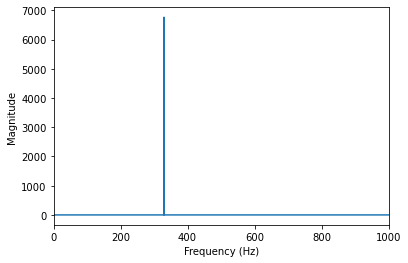

Played frequencies: [329.6]


In [5]:
data, sr = librosa.load(e_path, sr=None)
frequencies = getFrequencies(data, sr)

In [6]:
cde = "audio/cde.wav"
play(cde)

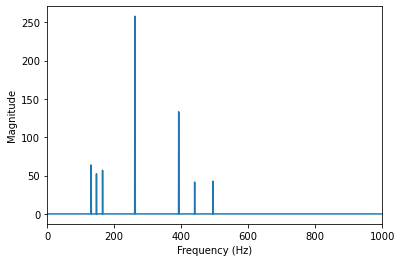


Hz played: [130.68012256581187, 146.806605776061, 165.0647505600787, 261.63828794559356, 392.5037723873853, 440.04909357622324]


In [7]:
data, sr = librosa.load(cde, sr=None)
frequencies = getFrequencies(data, sr, 40, False)

clean = cleanFrequencies(frequencies)
print("\nHz played: {}".format(clean))